In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '93de3f06-9ffc-4526-86a3-cf25534baf69',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [7]:
type(data)

dict

In [9]:
import pandas as pd


#This allows us to see all the columns, not just like 15ne)
pd.set_option('display.max_rows', None)

In [11]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11608,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972874e+07,1.972874e+07,...,54.1671,1.403646e+12,None,2024-07-21T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 16:43:15.743952
1,1027,Ethereum,ETH,ethereum,9150,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202283e+08,1.202283e+08,...,17.2768,4.205967e+11,None,2024-07-21T11:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 16:43:15.743952
2,825,Tether USDt,USDT,tether,92145,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.140392e+11,1.170722e+11,...,4.6859,1.171091e+11,None,2024-07-21T11:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-21 16:43:15.743952
3,1839,BNB,BNB,bnb,2196,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475818e+08,1.475818e+08,...,3.6055,8.777540e+10,None,2024-07-21T11:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 16:43:15.743952
4,5426,Solana,SOL,solana,707,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.643446e+08,5.805931e+08,...,3.2890,1.001153e+11,None,2024-07-21T11:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 16:43:15.743952
5,3408,USDC,USDC,usd-coin,21079,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.408991e+10,3.408991e+10,...,1.4003,3.408884e+10,None,2024-07-21T11:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-21 16:43:15.743952
6,52,XRP,XRP,xrp,1355,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.590948e+10,9.998743e+10,...,1.3571,5.909134e+10,None,2024-07-21T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 16:43:15.743952
7,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.452058e+11,1.452058e+11,...,0.7846,1.909993e+10,None,2024-07-21T11:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 16:43:15.743952
8,11419,Toncoin,TON,toncoin,466,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.514818e+09,5.109306e+09,...,0.7423,3.671600e+10,None,2024-07-21T11:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 16:43:15.743952
9,2010,Cardano,ADA,cardano,1214,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.589174e+10,3.706218e+10,...,0.6366,1.942921e+10,None,2024-07-21T11:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 16:43:15.743952


In [44]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '93de3f06-9ffc-4526-86a3-cf25534baf69',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df, df_append])

# Second way, Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\HP\OneDrive\Documents\Reading pandas\API.csv'):
        df.to_csv(r'C:\Users\HP\OneDrive\Documents\Reading pandas\API.csv', header='column_names')
    else:    
        df.to_csv(r'C:\Users\HP\OneDrive\Documents\Reading pandas\API.csv', mode='a', header=False)
        
df = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\Reading pandas\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11608,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.972874e+07,...,54.1867,1.403654e+12,NaN,2024-07-21T11:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
1,1,1027,Ethereum,ETH,ethereum,9150,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202283e+08,...,17.2696,4.202706e+11,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
2,2,825,Tether USDt,USDT,tether,92146,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.140392e+11,...,4.6896,1.171606e+11,NaN,2024-07-21T11:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-21 17:00:32.106760
3,3,1839,BNB,BNB,bnb,2196,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475818e+08,...,3.6019,8.765666e+10,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
4,4,5426,Solana,SOL,solana,707,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.643446e+08,...,3.2892,1.000841e+11,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
5,5,3408,USDC,USDC,usd-coin,21079,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.408991e+10,...,1.4013,3.410289e+10,NaN,2024-07-21T11:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-21 17:00:32.106760
6,6,52,XRP,XRP,xrp,1355,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.590948e+10,...,1.3382,5.824884e+10,NaN,2024-07-21T11:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
7,7,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.452058e+11,...,0.7833,1.906185e+10,NaN,2024-07-21T11:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
8,8,11419,Toncoin,TON,toncoin,466,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.514818e+09,...,0.7418,3.667506e+10,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
9,9,2010,Cardano,ADA,cardano,1214,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.589174e+10,...,0.6349,1.937255e+10,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760


In [42]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(30) #sleep for 30 sec
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [48]:
df8 = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\Reading pandas\API.csv')
df8

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11608,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.972874e+07,...,54.1867,1.403654e+12,NaN,2024-07-21T11:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
1,1,1027,Ethereum,ETH,ethereum,9150,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202283e+08,...,17.2696,4.202706e+11,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
2,2,825,Tether USDt,USDT,tether,92146,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.140392e+11,...,4.6896,1.171606e+11,NaN,2024-07-21T11:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-21 17:00:32.106760
3,3,1839,BNB,BNB,bnb,2196,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475818e+08,...,3.6019,8.765666e+10,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
4,4,5426,Solana,SOL,solana,707,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.643446e+08,...,3.2892,1.000841e+11,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
5,5,3408,USDC,USDC,usd-coin,21079,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.408991e+10,...,1.4013,3.410289e+10,NaN,2024-07-21T11:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-21 17:00:32.106760
6,6,52,XRP,XRP,xrp,1355,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.590948e+10,...,1.3382,5.824884e+10,NaN,2024-07-21T11:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
7,7,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.452058e+11,...,0.7833,1.906185e+10,NaN,2024-07-21T11:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
8,8,11419,Toncoin,TON,toncoin,466,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.514818e+09,...,0.7418,3.667506e+10,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
9,9,2010,Cardano,ADA,cardano,1214,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.589174e+10,...,0.6349,1.937255e+10,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760


In [50]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11608,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.972874e+07,...,54.1867,1.403654e+12,NaN,2024-07-21T11:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
1,1,1027,Ethereum,ETH,ethereum,9150,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202283e+08,...,17.2696,4.202706e+11,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
2,2,825,Tether USDt,USDT,tether,92146,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.140392e+11,...,4.6896,1.171606e+11,NaN,2024-07-21T11:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-21 17:00:32.106760
3,3,1839,BNB,BNB,bnb,2196,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475818e+08,...,3.6019,8.765666e+10,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
4,4,5426,Solana,SOL,solana,707,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.643446e+08,...,3.2892,1.000841e+11,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
5,5,3408,USDC,USDC,usd-coin,21079,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.408991e+10,...,1.4013,3.410289e+10,NaN,2024-07-21T11:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-21 17:00:32.106760
6,6,52,XRP,XRP,xrp,1355,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.590948e+10,...,1.3382,5.824884e+10,NaN,2024-07-21T11:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
7,7,74,Dogecoin,DOGE,dogecoin,1025,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.452058e+11,...,0.7833,1.906185e+10,NaN,2024-07-21T11:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
8,8,11419,Toncoin,TON,toncoin,466,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.514818e+09,...,0.7418,3.667506e+10,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760
9,9,2010,Cardano,ADA,cardano,1214,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.589174e+10,...,0.6349,1.937255e+10,NaN,2024-07-21T11:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-21 17:00:32.106760


In [52]:
#To look at the coin trends over time

df9 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df9

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.154692,0.395551,11.319317,4.533650,-4.574228,1.326216
Ethereum,-0.097601,0.201716,9.074638,-0.249349,-6.327255,9.125155
Tether USDt,0.047617,0.027217,0.046124,0.152766,0.105307,0.026460
BNB,-0.079635,0.578510,10.644891,1.297558,-4.283339,-1.053788
Solana,-0.247584,2.412383,18.415074,30.220126,-4.390615,12.564418
USDC,0.044950,0.048468,0.035873,0.046442,0.045497,0.038110
XRP,-1.413473,-1.051747,9.645518,18.385806,9.032294,9.277504
Dogecoin,-0.233126,4.078890,16.242979,5.372441,-21.533523,-17.812419
Toncoin,-0.569583,-1.951041,-2.387187,0.639230,14.026906,17.716304


In [56]:
df10 = df9.stack()
df10

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.154692
             quote.USD.percent_change_24h     0.395551
             quote.USD.percent_change_7d     11.319317
             quote.USD.percent_change_30d     4.533650
             quote.USD.percent_change_60d    -4.574228
             quote.USD.percent_change_90d     1.326216
Ethereum     quote.USD.percent_change_1h     -0.097601
             quote.USD.percent_change_24h     0.201716
             quote.USD.percent_change_7d      9.074638
             quote.USD.percent_change_30d    -0.249349
             quote.USD.percent_change_60d    -6.327255
             quote.USD.percent_change_90d     9.125155
Tether USDt  quote.USD.percent_change_1h      0.047617
             quote.USD.percent_change_24h     0.027217
             quote.USD.percent_change_7d      0.046124
             quote.USD.percent_change_30d     0.152766
             quote.USD.percent_change_60d     0.105307
             quote.USD.

In [58]:
type(df10)

pandas.core.series.Series

In [60]:
df11 = df10.to_frame(name='values')
df11

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -0.154692
            quote.USD.percent_change_24h   0.395551
            quote.USD.percent_change_7d   11.319317
            quote.USD.percent_change_30d   4.533650
            quote.USD.percent_change_60d  -4.574228
            quote.USD.percent_change_90d   1.326216
Ethereum    quote.USD.percent_change_1h   -0.097601
            quote.USD.percent_change_24h   0.201716
            quote.USD.percent_change_7d    9.074638
            quote.USD.percent_change_30d  -0.249349
            quote.USD.percent_change_60d  -6.327255
            quote.USD.percent_change_90d   9.125155
Tether USDt quote.USD.percent_change_1h    0.047617
            quote.USD.percent_change_24h   0.027217
            quote.USD.percent_change_7d    0.046124
            quote.USD.percent_change_30d   0.152766
            quote.USD.percent_change_60d   0.105307
            quote.USD.percent_change_90d   0.026460
BNB         quote.USD.percent_change_1h   -0.079635
            quote.USD.percent_change_24h   0.578510
            quote.USD.percent_change_7d   10.644891
            quote.USD.percent_change_30d   1.297558
            quote.USD.percent_change_60d  -4.283339
            quote.USD.percent_change_90d  -1.053788
Solana      quote.USD.percent_change_1h   -0.247584
            quote.USD.percent_change_24h   2.412383
            quote.USD.percent_change_7d   18.415074
            quote.USD.percent_change_30d  30.220126
            quote.USD.percent_change_60d  -4.390615
            quote.USD.percent_change_90d  12.564418
USDC        quote.USD.percent_change_1h    0.044950
            quote.USD.percent_change_24h   0.048468
            quote.USD.percent_change_7d    0.035873
            quote.USD.percent_change_30d   0.046442
            quote.USD.percent_change_60d   0.045497
            quote.USD.percent_change_90d   0.038110
XRP         quote.USD.percent_change_1h   -1.413473
            quote.USD.percent_change_24h  -1.051747
            quote.USD.percent_change_7d    9.645518
            quote.USD.percent_change_30d  18.385806
            quote.USD.percent_change_60d   9.032294
            quote.USD.percent_change_90d   9.277504
Dogecoin    quote.USD.percent_change_1h   -0.233126
            quote.USD.percent_change_24h   4.078890
            quote.USD.percent_change_7d   16.242979
            quote.USD.percent_change_30d   5.372441
            quote.USD.percent_change_60d -21.533523
            quote.USD.percent_change_90d -17.812419
Toncoin     quote.USD.percent_change_1h   -0.569583
            quote.USD.percent_change_24h  -1.951041
            quote.USD.percent_change_7d   -2.387187
            quote.USD.percent_change_30d   0.639230
            quote.USD.percent_change_60d  14.026906
            quote.USD.percent_change_90d  17.716304
Cardano     quote.USD.percent_change_1h   -0.475346
            quote.USD.percent_change_24h  -0.863958
            quote.USD.percent_change_7d   -0.594061
            quote.USD.percent_change_30d  11.712219
            quote.USD.percent_change_60d -11.376899
            quote.USD.percent_change_90d -15.790660
TRON        quote.USD.percent_change_1h   -0.079454
            quote.USD.percent_change_24h   0.040020
            quote.USD.percent_change_7d   -2.625136
            quote.USD.percent_change_30d  14.272834
            quote.USD.percent_change_60d  10.263602
            quote.USD.percent_change_90d  20.928453
Avalanche   quote.USD.percent_change_1h    0.769900
            quote.USD.percent_change_24h   5.115852
            quote.USD.percent_change_7d   13.659979
            quote.USD.percent_change_30d   5.723555
            quote.USD.percent_change_60d -27.449720
            quote.USD.percent_change_90d -25.274273
Shiba Inu   quote.USD.percent_change_1h   -0.730584
            quote.USD.percent_change_24h   0.602934
            quote.USD.percent_change_7d    2.516544
            quote.USD.percent_change_30d 

In [62]:
df11.count()

values    90
dtype: int64

In [64]:
index = pd.Index(range(90))

# Setting the above DataFrame index object as the index
# using set_index() function
df12 = df11.reset_index()
df12

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.154692
1,Bitcoin,quote.USD.percent_change_24h,0.395551
2,Bitcoin,quote.USD.percent_change_7d,11.319317
3,Bitcoin,quote.USD.percent_change_30d,4.533650
4,Bitcoin,quote.USD.percent_change_60d,-4.574228
5,Bitcoin,quote.USD.percent_change_90d,1.326216
6,Ethereum,quote.USD.percent_change_1h,-0.097601
7,Ethereum,quote.USD.percent_change_24h,0.201716
8,Ethereum,quote.USD.percent_change_7d,9.074638
9,Ethereum,quote.USD.percent_change_30d,-0.249349


In [68]:
df13 = df12.rename(columns={'level_1': 'percent_changed'})
df13

,name,percent_changed,values
0,Bitcoin,quote.USD.percent_change_1h,-0.154692
1,Bitcoin,quote.USD.percent_change_24h,0.395551
2,Bitcoin,quote.USD.percent_change_7d,11.319317
3,Bitcoin,quote.USD.percent_change_30d,4.533650
4,Bitcoin,quote.USD.percent_change_60d,-4.574228
5,Bitcoin,quote.USD.percent_change_90d,1.326216
6,Ethereum,quote.USD.percent_change_1h,-0.097601
7,Ethereum,quote.USD.percent_change_24h,0.201716
8,Ethereum,quote.USD.percent_change_7d,9.074638
9,Ethereum,quote.USD.percent_change_30d,-0.249349


In [70]:
df13['percent_changed'] = df13['percent_changed'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df13

,name,percent_changed,values
0,Bitcoin,quote.USD.percent_change_1h,-0.154692
1,Bitcoin,24h,0.395551
2,Bitcoin,7d,11.319317
3,Bitcoin,30d,4.533650
4,Bitcoin,60d,-4.574228
5,Bitcoin,90d,1.326216
6,Ethereum,quote.USD.percent_change_1h,-0.097601
7,Ethereum,24h,0.201716
8,Ethereum,7d,9.074638
9,Ethereum,30d,-0.249349


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

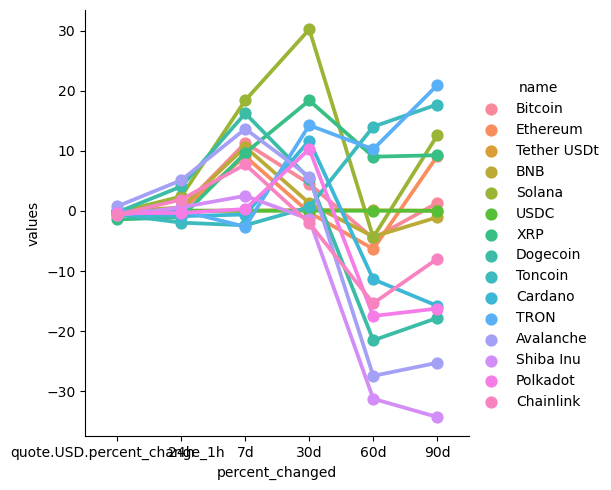

In [76]:
sns.catplot(x='percent_changed', y='values', hue='name', data=df13, kind='point')

In [78]:
# Now to do something much simpler
# im going to create a dataframe with the columns i want

df14 = df[['name','quote.USD.price','timestamp']]
df14 = df14.query("name == 'Bitcoin'")
df14

,name,quote.USD.price,timestamp
0,Bitcoin,66840.676977,2024-07-21 17:00:32.106760
15,Bitcoin,66843.798773,2024-07-21 17:01:08.718839
30,Bitcoin,66843.798773,2024-07-21 17:01:40.323867
45,Bitcoin,66819.149555,2024-07-21 17:02:12.052377
60,Bitcoin,66819.149555,2024-07-21 17:02:43.740427


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\AppData\Local\Temp\ipykernel_464\2375757063.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


[Text(0, 0, '2024-07-21 17:00:32.106760'),
 Text(1, 0, '2024-07-21 17:01:08.718839'),
 Text(2, 0, '2024-07-21 17:01:40.323867'),
 Text(3, 0, '2024-07-21 17:02:12.052377'),
 Text(4, 0, '2024-07-21 17:02:43.740427')]

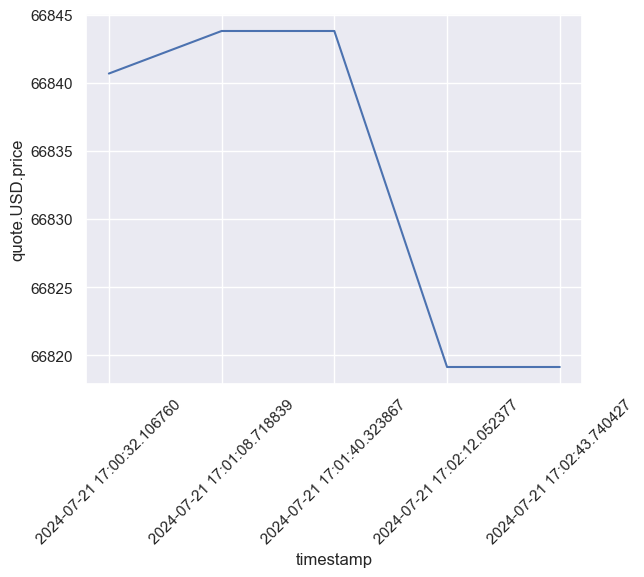

In [84]:
sns.set_theme(style="darkgrid")

axes=sns.lineplot(x='timestamp', y='quote.USD.price', data = df14)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)